In [4]:
# ruff: disabled
"""An example notebook for a data_analysis notebook you may write.

Please use the recommended TNR font unless your venue requires otherwise.
"""

# Write down all of your code for data analysis in this file.
# Plot the data and save the figures/tables in the folders "plots" and "tables"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy

# Use TNR for all figures
# to match paper templates
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = [
    "Times New Roman",
] + plt.rcParams["font.serif"]

# Whitegrid is most appropriate
# for scientific papers
sns.set_style("whitegrid")

# An optional colorblind palette
# for figures
CB_color_cycle = [
    "#377EB8",
    "#FF7F00",
    "#4DAF4A",
    "#F781BF",
    "#A65628",
    "#984EA3",
    "#999999",
    "#E41A1C",
    "#DEDE00",
]

In [5]:
import wandb

api = wandb.Api()
entity, project = "kornelszabo", "template"
runs = api.runs(entity + "/" + project)

summary_list, config_list, name_list = [], [], []
for run in runs:
    # .summary contains output keys/values for
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame(
    {"summary": summary_list, "config": config_list, "name": name_list}
)

# runs_df.to_csv("project.csv")
# runs_df

,summary,config,name
0,"{'test_accuracy': 0.18274365821094793, 'train_...","{'fed': {'seed': 5, 'num_rounds': 50, 'rng_fol...",e86e23182426487bb2dd149c46d37e1c
1,"{'_runtime': 681.1824424266815, '_timestamp': ...","{'fed': {'seed': 1, 'num_rounds': 50, 'rng_fol...",dd2072196a9f482c816bcc231285bb8f
2,"{'_step': 50, '_wandb': {'runtime': 2045}, '_r...","{'fed': {'seed': 4, 'num_rounds': 50, 'rng_fol...",be5d40c0df5a47169a538d45de356381
3,{'_wandb': {'runtime': 1}},{},skilled-mountain-97
4,"{'_wandb': {'runtime': 2568}, '_runtime': 2564...","{'fed': {'seed': 3, 'num_rounds': 50, 'rng_fol...",b2c7fe18dc9f43c3b47518369196e459
5,"{'_step': 50, 'lambdas': {'0': 0.0908944269938...","{'fed': {'seed': 5, 'num_rounds': 50, 'rng_fol...",08e9e460f4394e71ba710569363c5e11
6,"{'_wandb': {'runtime': 2385}, 'train_loss': 0....","{'fed': {'seed': 2, 'num_rounds': 50, 'rng_fol...",0e5a0b6a905943c4b2309ef426e168b7
7,"{'train_accuracy': 0.9590210291541704, 'centra...","{'fed': {'seed': 4, 'num_rounds': 50, 'rng_fol...",4692cc7e0af64f6cac89e428b0d72bc5
8,"{'_runtime': 2433.928905248642, '_timestamp': ...","{'fed': {'seed': 1, 'num_rounds': 50, 'rng_fol...",b6dda99592d64c06b43fa55f09041144
9,"{'_step': 50, 'lambdas': {'4': 0.0850067968800...","{'fed': {'seed': 3, 'num_rounds': 50, 'rng_fol...",71f11b7f4788491f9c336c643776bb6d


In [82]:
values = [[] for _ in range(51)]
correlations = []
p_values = []
columns = []
for file in ["train_accuracy", "test_accuracy"]:
    df = pd.read_csv(f"./tables/exp1_{file}.csv") - 0.5
    cols = [f"afl_{j}_schedule_all - {file}" for j in range(1, 4)]
    columns.extend([file for _ in range(3)])
    for i, row in enumerate(df[cols].values):
        values[i].extend(row)

    corr_1 = scipy.stats.pearsonr(df[cols[0]], df[cols[1]])
    corr_2 = scipy.stats.pearsonr(df[cols[0]], df[cols[2]])
    corr_3 = scipy.stats.pearsonr(df[cols[1]], df[cols[2]])

    p_values.append([x.pvalue for x in [corr_1, corr_2, corr_3]])
    correlations.append([x.statistic for x in [corr_1, corr_2, corr_3]])

In [83]:
pd.DataFrame(
    p_values,
    columns=["runs 1, 2", "runs 1, 3", "runs 2, 3"],
    index=["train_accuracy", "test_accuracy"],
)

,"runs 1, 2","runs 1, 3","runs 2, 3"
train_accuracy,4.900438e-30,6.941415e-35,3.696339e-45
test_accuracy,2.404333e-46,4.910182e-41,1.445518e-42


In [66]:
pd.Series(correlations).nsmallest(5)

0    0.966607
1    0.979151
4    0.987561
5    0.989236
2    0.992266
dtype: float64

In [64]:
pd.Series(p_values).nlargest(5)

0    4.900438e-30
1    6.941415e-35
4    4.910182e-41
5    1.445518e-42
2    3.696339e-45
dtype: float64

In [40]:
dfx = pd.read_csv("./tables/exp1_test_accuracy.csv")
cols = [f"afl_{j}_schedule_all - test_accuracy" for j in range(1, 4)]

dfx = pd.DataFrame(dfx[cols].values, columns=["test_accuracy" for _ in range(3)])

,test_accuracy,test_accuracy,test_accuracy
0,0.098000,0.085100,0.074000
1,0.161527,0.100358,0.086317
2,0.189864,0.112449,0.158045
3,0.188042,0.132830,0.229280
4,0.199465,0.170600,0.235417
5,0.229229,0.191390,0.233309
6,0.254889,0.183449,0.232919
7,0.269168,0.218751,0.252473
8,0.281348,0.280486,0.277999
9,0.310084,0.321429,0.301449


In [41]:
dfy = pd.read_csv("./tables/exp1_train_accuracy.csv")
cols = [f"afl_{j}_schedule_all - train_accuracy" for j in range(1, 4)]

dfy = pd.DataFrame(dfy[cols].values, columns=["train_accuracy" for _ in range(3)])

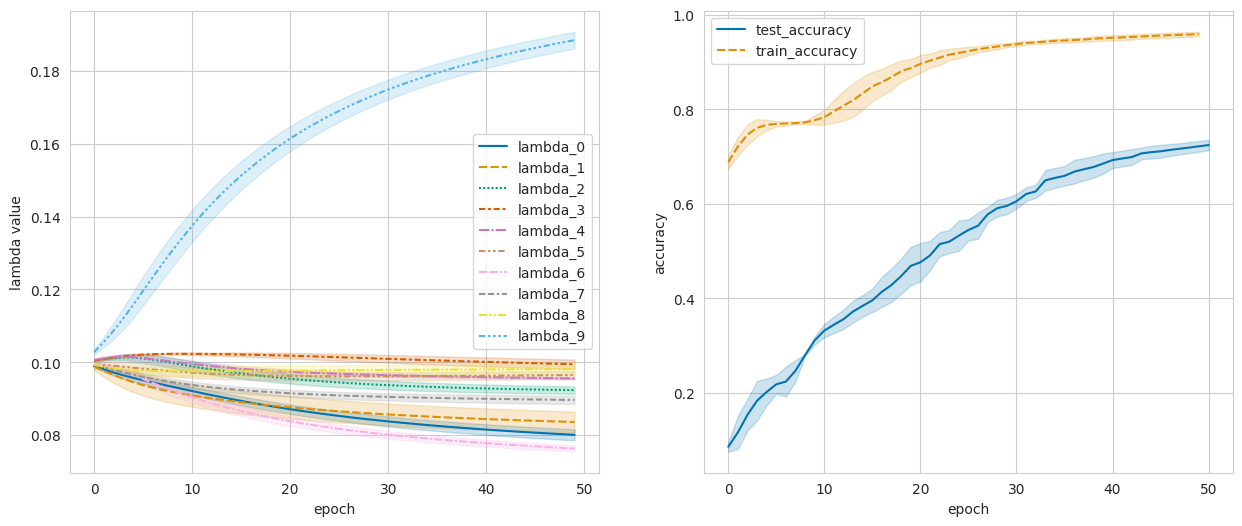

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
x = sns.lineplot(
    pd.DataFrame(values, columns=columns), errorbar="sd", palette="colorblind", ax=ax[0]
)
x.set(xlabel="epoch", ylabel="lambda value")

y = sns.lineplot(
    pd.concat([dfx, dfy], axis=1), errorbar="sd", palette="colorblind", ax=ax[1]
)
y.set(xlabel="epoch", ylabel="accuracy")


plt.savefig("./plots/exp_1.png", bbox_inches="tight")